In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from training_utils import CIFAR10_dataloaders, training_monitor, print_model_size

# Set device (GPU if available, mps on Mac, else CPU)
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

In [5]:
class SimpleMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),  # Flatten image to vector
            nn.Linear(32 * 32 * 3, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        return self.model(x)

In [6]:
print_model_size(SimpleMLP())

Total params = 1.707274e+06
Trainable params = 1.707274e+06


Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/10 [00:00<?, ?it/s]

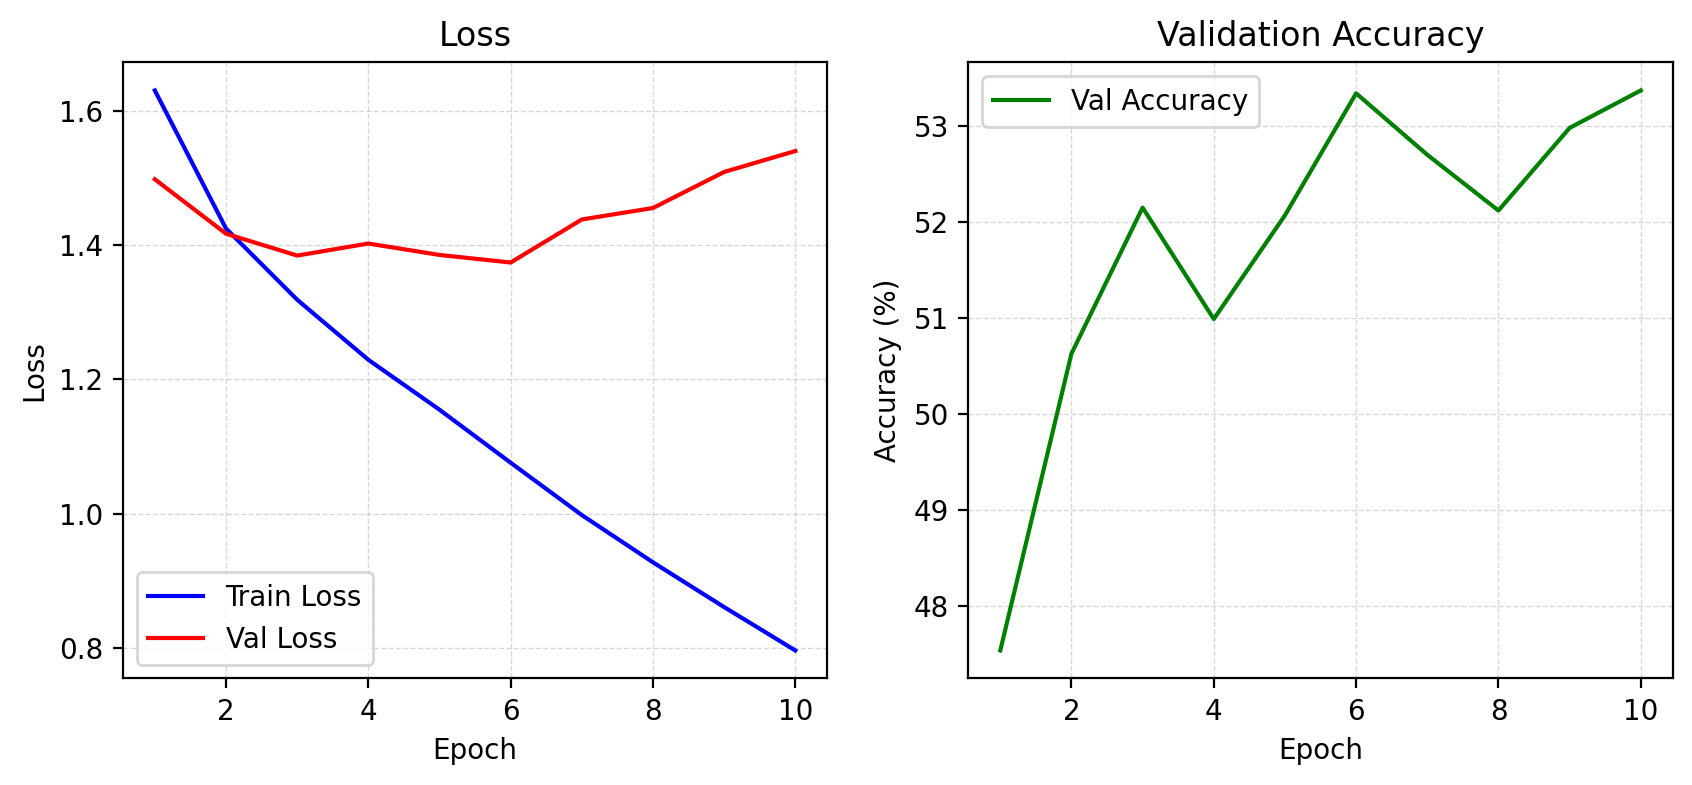

Epoch 10/10: 100%|##########| 10/10 [03:00<00:00, 24.10s/it]

|       Epoch        |     Train loss     |  Validation loss   | Validation accuracy, %  |
__________________________________________________________________________________________
|         1          |       1.6303       |       1.4980       |         47.5400         |
|         2          |       1.4246       |       1.4169       |         50.6300         |
|         3          |       1.3185       |       1.3843       |         52.1500         |
|         4          |       1.2290       |       1.4022       |         50.9900         |
|         5          |       1.1547       |       1.3852       |         52.0700         |
|         6          |       1.0757       |       1.3740       |         53.3400         |
|         7          |       0.9977       |       1.4381       |         52.7000         |
|         8          |       0.9272       |       1.4552       |         52.1200         |
|         9          |       0.8606       |       1.5089       |         52.9800         |

In [7]:
trainloader, testloader, classes = CIFAR10_dataloaders(batch_size=64)
model = SimpleMLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 10

trained_model = training_monitor(device, model, optimizer, criterion, num_epochs, trainloader, testloader)
